#**Simple Linear Regression - Assignment**
 

#**A. Delivery_time -> Predict delivery time using sorting time**
**Data** = delivery_time.csv 

## **Importing Necessary Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## **Importing Data**

In [4]:
dataset=pd.read_csv('delivery_time.csv')
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## **Initial Analysis**

In [5]:
dataset.shape

(21, 2)

In [6]:
dataset.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [7]:
dataset.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [8]:
dataset.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


## **Data Vizualization**

In [9]:
import warnings
warnings.filterwarnings('ignore')

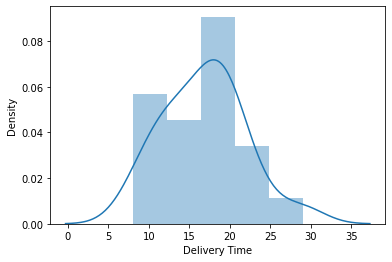

In [10]:
sns.distplot(dataset['Delivery Time'])
plt.show()

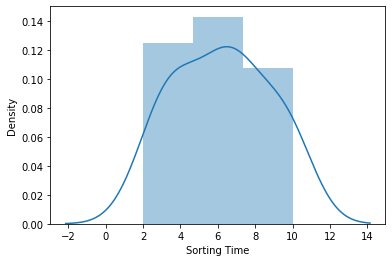

In [11]:
sns.distplot(dataset['Sorting Time'])
plt.show()

## **Assumption Check**

#### **1.Check Linearity**

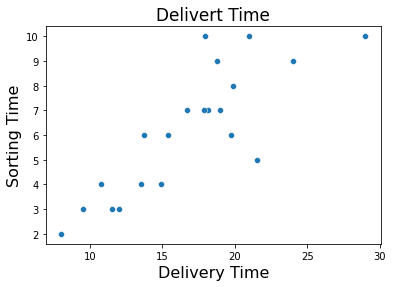

In [12]:
sns.scatterplot(x='Delivery Time', y='Sorting Time',data =dataset)
plt.xlabel('Delivery Time',size = 16)
plt.ylabel('Sorting Time',size = 16)
plt.title('Delivert Time',size = 17)
plt.show()

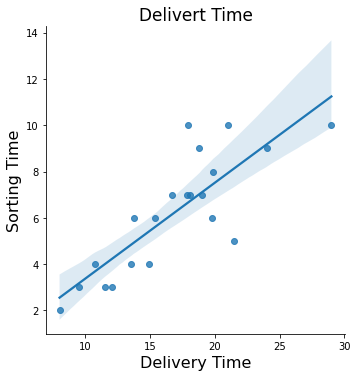

In [13]:
sns.lmplot(x='Delivery Time', y='Sorting Time',data =dataset)
plt.xlabel('Delivery Time',size = 16)
plt.ylabel('Sorting Time',size = 16)
plt.title('Delivert Time',size = 17)
plt.show()

#### **2.No Multicollinearity**

In [14]:
corr_matrix = dataset.corr()
corr_matrix

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


#### **3.Homoscedasticity** - Need to check

#### **4.No Autoregression** - Condition satisfied

#### **5.Zero residual mean** - it can be checked post model building and training.

## **Model Building**

In [15]:
import statsmodels.formula.api as smf

In [16]:
dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset # Renaming Columns

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [17]:
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()

## **Model Testing**

In [18]:
# Finding Coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [19]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64, Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [20]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

## **Model Predictions**

In [21]:
# Manual prediction for say sorting time 6
delivery_time = (6.582734) + (1.649020)*(6)
delivery_time

16.476854

In [22]:
# Automatic Prediction for say sorting time 6, 7
new_data=pd.Series([6,7])
new_data

0    6
1    7
dtype: int64

In [23]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,6
1,7


In [24]:
model.predict(data_pred)

0    16.476853
1    18.125873
dtype: float64

#**B. Salary_hike -> Build a prediction model for Salary_hike**

**Data** = Salary_Data.csv

In [32]:
dataset_2 =pd.read_csv('Salary_Data.csv')
dataset_2

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## **EDA and Data Visualization**

In [33]:
dataset_2.shape

(30, 2)

In [34]:
dataset_2.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [35]:
dataset_2.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [36]:
dataset_2.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


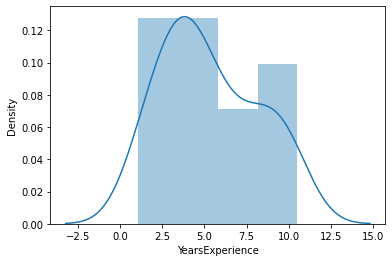

In [37]:
sns.distplot(dataset_2['YearsExperience'])
plt.show()

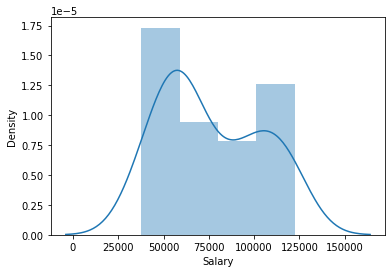

In [38]:
sns.distplot(dataset_2['Salary'])
plt.show()

## **Correlation Analysis**

In [39]:
dataset_2.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


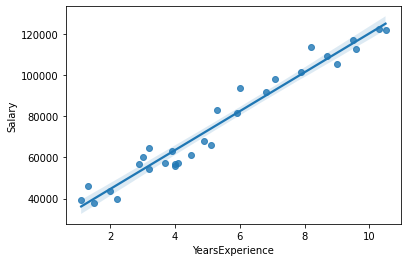

In [40]:
sns.regplot(x=dataset_2['YearsExperience'],y=dataset_2['Salary'])
plt.show()

## **Model Building**

In [41]:
model=smf.ols("Salary~YearsExperience",data=dataset_2).fit()

## **Model Testing**

In [42]:
# Finding Cefficient Parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [43]:
# Finding Pvalues and tvalues
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64, Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [44]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

## **Model Predictions**

In [50]:
# Manual prediction for say 5 Years Experience
Salary = (25792.200199) + (9449.962321)*(5)
Salary

73042.01180400001

In [46]:
# Automatic Prediction for say 5 & 6 Years Experience 

In [51]:
new_data=pd.Series([5,6])
new_data

0    5
1    6
dtype: int64

In [52]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,5
1,6


In [53]:
model.predict(data_pred)

0    73042.011806
1    82491.974127
dtype: float64